In [26]:
import pandas as pd 
import numpy as np

In [27]:
df = df = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\Your Top Songs 2023 - Skiley Export (1).csv", sep=',')

In [28]:
df.head()

,albumArtistsNames,albumReleaseDate,albumType,albumName,artistGenres,trackName
0,Lana Del Rey,2011-01-01,album,Born To Die (Deluxe Version),"Art Pop, Pop",Summertime Sadness
1,Taylor Swift,2019-08-23,album,Lover,Pop,I Think He Knows
2,Taylor Swift,2017-11-10,album,reputation,Pop,Call It What You Want
3,Taylor Swift,2019-08-23,album,Lover,Pop,Cruel Summer
4,Lana Del Rey,2011-01-01,album,Born To Die (Deluxe Version),"Art Pop, Pop",Born To Die


In [79]:
import lyricsgenius

In [80]:
api_key = "U-frco-14QLRSdsrBbvnFh1leqrwYaQNq7KFXfJTFgBubwYqOchlMdrxDhyW-jf_"
genius = lyricsgenius.Genius(api_key)

In [81]:
def fetch_lyrics(artist_name, track_name):
    try:
        artist = genius.search_artist(artist_name, max_songs=0, sort='title')
        song = artist.song(track_name)
        return song.lyrics if song else None
    except Exception as e:
        print(f"Error fetching lyrics for {artist_name} - {track_name}: {e}")
        return None

In [82]:
def add_lyrics_to_dataframe(df, artist_col='albumArtistsNames', track_col='trackName', lyrics_col='lyrics'):
    df[lyrics_col] = df.apply(lambda row: fetch_lyrics(row[artist_col], row[track_col]), axis=1)
    return df

In [33]:
df_with_lyrics = add_lyrics_to_dataframe(df)

Searching for songs by Lana Del Rey...

Done. Found 0 songs.
Searching for "Summertime Sadness" by Lana Del Rey...
Done.
Searching for songs by Taylor Swift...

Done. Found 0 songs.
Searching for "I Think He Knows" by Taylor Swift...
Done.
Searching for songs by Taylor Swift...

Done. Found 0 songs.
Searching for "Call It What You Want" by Taylor Swift...
Done.
Searching for songs by Taylor Swift...

Done. Found 0 songs.
Searching for "Cruel Summer" by Taylor Swift...
Done.
Searching for songs by Lana Del Rey...

Done. Found 0 songs.
Searching for "Born To Die" by Lana Del Rey...
Done.
Searching for songs by Gracie Abrams...

Done. Found 0 songs.
Searching for "Mess It Up" by Gracie Abrams...
Done.
Searching for songs by Doja Cat...

Done. Found 0 songs.
Searching for "Candy" by Doja Cat...
Done.
Searching for songs by Taylor Swift...

Done. Found 0 songs.
Searching for "I Can See You (Taylor’s Version) (From The Vault)" by Taylor Swift...
Done.
Searching for songs by Lana Del Rey...



In [34]:
df.head()

,albumArtistsNames,albumReleaseDate,albumType,albumName,artistGenres,trackName,lyrics
0,Lana Del Rey,2011-01-01,album,Born To Die (Deluxe Version),"Art Pop, Pop",Summertime Sadness,166 ContributorsTranslationsΕλληνικάSvenskaPor...
1,Taylor Swift,2019-08-23,album,Lover,Pop,I Think He Knows,80 ContributorsTranslationsРусскийEspañolСрпск...
2,Taylor Swift,2017-11-10,album,reputation,Pop,Call It What You Want,139 ContributorsTranslationsPolskiРусскийFranç...
3,Taylor Swift,2019-08-23,album,Lover,Pop,Cruel Summer,207 ContributorsTranslationsTürkçeEspañolСрпск...
4,Lana Del Rey,2011-01-01,album,Born To Die (Deluxe Version),"Art Pop, Pop",Born To Die,170 ContributorsTranslationsEspañolDeutschΕλλη...


In [35]:
df['lyrics'].iloc[1]

'80 ContributorsTranslationsРусскийEspañolСрпскиPortuguêsPolskiItalianoFrançaisTürkçeDeutschI Think He Knows Lyrics[Verse 1]\nI think he knows\nHis footprints on the sidewalk\nLead to where I can\'t stop\nGo there every\u2005night\nI\u2005think he knows\nHis\u2005hands around a cold glass\nMake me\u2005wanna know that\nBody like it\'s mine\n\n[Pre-Chorus]\nHe got that boyish look that I like in a man\nI am an architect, I\'m drawing up the plans\nIt\'s like I\'m 17, nobody understands\nNo one understands\n\n[Chorus]\nHe got my heartbeat\nSkipping down 16th Avenue\nGot that, ah, I mean\nWanna see what\'s under that attitude like\nI want you, bless my soul\nAnd I ain\'t gotta tell him, I think he knows\nI think he knows\n\n[Verse 2]\nI think he knows\nWhen we get all alone\nI\'ll make myself at home\nAnd he\'ll want me to stay\nI think he knows\nHe\'d better lock it down\nOr I won\'t stick around\n\'Cause good ones never wait (Ha)\nSee Taylor Swift LiveGet tickets as low as $225You might

In [36]:
def clean_lyrics(lyrics):
    if lyrics:
        return lyrics.split('\n', 1)[-1]
    return None

In [37]:
df.head()

,albumArtistsNames,albumReleaseDate,albumType,albumName,artistGenres,trackName,lyrics
0,Lana Del Rey,2011-01-01,album,Born To Die (Deluxe Version),"Art Pop, Pop",Summertime Sadness,166 ContributorsTranslationsΕλληνικάSvenskaPor...
1,Taylor Swift,2019-08-23,album,Lover,Pop,I Think He Knows,80 ContributorsTranslationsРусскийEspañolСрпск...
2,Taylor Swift,2017-11-10,album,reputation,Pop,Call It What You Want,139 ContributorsTranslationsPolskiРусскийFranç...
3,Taylor Swift,2019-08-23,album,Lover,Pop,Cruel Summer,207 ContributorsTranslationsTürkçeEspañolСрпск...
4,Lana Del Rey,2011-01-01,album,Born To Die (Deluxe Version),"Art Pop, Pop",Born To Die,170 ContributorsTranslationsEspañolDeutschΕλλη...


In [38]:
def clean_lyrics(lyrics):
    if pd.notna(lyrics):
        return lyrics.split('\n', 1)[-1]
    return lyrics

def clean_lyrics_column(df, lyrics_col='lyrics'):
    df[lyrics_col] = df[lyrics_col].apply(clean_lyrics)
    return df

In [39]:
df = clean_lyrics_column(df)

In [40]:
df.head()

,albumArtistsNames,albumReleaseDate,albumType,albumName,artistGenres,trackName,lyrics
0,Lana Del Rey,2011-01-01,album,Born To Die (Deluxe Version),"Art Pop, Pop",Summertime Sadness,Kiss me hard before you go\nSummertime sadness...
1,Taylor Swift,2019-08-23,album,Lover,Pop,I Think He Knows,I think he knows\nHis footprints on the sidewa...
2,Taylor Swift,2017-11-10,album,reputation,Pop,Call It What You Want,My castle crumbled overnight\nI brought a knif...
3,Taylor Swift,2019-08-23,album,Lover,Pop,Cruel Summer,"(Yeah, yeah, yeah, yeah)\n\n[Verse 1]\nFever d..."
4,Lana Del Rey,2011-01-01,album,Born To Die (Deluxe Version),"Art Pop, Pop",Born To Die,Why? (Got that?)\nWho? Me? (Louder)\nWhy? (Got...


In [41]:
df.to_csv('final_playlist.csv')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = df = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\final_playlist.csv")

In [4]:
df.head()

,Unnamed: 0,albumArtistsNames,albumReleaseDate,albumType,albumName,artistGenres,trackName,lyrics
0,0,Lana Del Rey,2011-01-01,album,Born To Die (Deluxe Version),"Art Pop, Pop",Summertime Sadness,Kiss me hard before you go\nSummertime sadness...
1,1,Taylor Swift,2019-08-23,album,Lover,Pop,I Think He Knows,I think he knows\nHis footprints on the sidewa...
2,2,Taylor Swift,2017-11-10,album,reputation,Pop,Call It What You Want,My castle crumbled overnight\nI brought a knif...
3,3,Taylor Swift,2019-08-23,album,Lover,Pop,Cruel Summer,"(Yeah, yeah, yeah, yeah)\n\n[Verse 1]\nFever d..."
4,4,Lana Del Rey,2011-01-01,album,Born To Die (Deluxe Version),"Art Pop, Pop",Born To Die,Why? (Got that?)\nWho? Me? (Louder)\nWhy? (Got...


In [90]:
data = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\data_moods.csv")

In [92]:
data.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [93]:
data = data[['name','album','artist','mood']]

In [94]:
data.head()

,name,album,artist,mood
0,1999,1999,Prince,Happy
1,23,23,Blonde Redhead,Sad
2,9 Crimes,9,Damien Rice,Sad
3,99 Luftballons,99 Luftballons,Nena,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,Energetic


In [95]:
data.rename(columns={'name': 'trackName', 'album': 'albumName', 'artist': 'albumArtistsName'}, inplace=True)

In [96]:
data.head()

,trackName,albumName,albumArtistsName,mood
0,1999,1999,Prince,Happy
1,23,23,Blonde Redhead,Sad
2,9 Crimes,9,Damien Rice,Sad
3,99 Luftballons,99 Luftballons,Nena,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,Energetic


In [97]:
dance = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\dance_pop_mix.csv")

In [98]:
dance.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,ISRC,Added By,Added At
0,spotify:track:2bL2gyO6kBdLkNSkxXNh6x,Animals,spotify:artist:04gDigrS5kc9YWfZHwBETP,Maroon 5,spotify:album:2Auw0pTT6EcQdvHNimhLQI,V,spotify:artist:04gDigrS5kc9YWfZHwBETP,Maroon 5,2014-09-02,https://i.scdn.co/image/ab67616d0000b273442b53...,1,2,231013,https://p.scdn.co/mp3-preview/c630a46d6c96188d...,False,79,USUM71409576,spotify:user:,1970-01-01T00:00:00Z
1,spotify:track:0QsvXIfqM0zZoerQfsI9lm,Don't Let Me Down,"spotify:artist:69GGBxA162lTqCwzJG5jLp, spotify...","The Chainsmokers, Daya",spotify:album:3ShQFl9FladFKlonwPGZFc,The Chainsmokers- Japan Special Edition,spotify:artist:69GGBxA162lTqCwzJG5jLp,The Chainsmokers,2016-08-10,https://i.scdn.co/image/ab67616d0000b27308d87f...,1,6,208053,https://p.scdn.co/mp3-preview/4db7d84bd5906590...,False,43,USQX91600011,spotify:user:,1970-01-01T00:00:00Z
2,spotify:track:2Zo1PcszsT9WQ0ANntJbID,Feather,spotify:artist:74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,spotify:album:2g4aJTa5ejGpp0O0GKzWAQ,emails i can’t send fwd:,spotify:artist:74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,2023-03-17,https://i.scdn.co/image/ab67616d0000b2730f4562...,1,15,185552,https://p.scdn.co/mp3-preview/fda145d12a843062...,True,89,USUM72301876,spotify:user:,1970-01-01T00:00:00Z
3,spotify:track:1vvNmPOiUuyCbgWmtc6yfm,My Way,spotify:artist:7CajNmpbOovFoOoasH2HaY,Calvin Harris,spotify:album:0dzeoQhVNzKkwM5ieOJC54,My Way,spotify:artist:7CajNmpbOovFoOoasH2HaY,Calvin Harris,2016-09-16,https://i.scdn.co/image/ab67616d0000b2738d12bc...,1,1,219159,https://p.scdn.co/mp3-preview/ed8d125912048b01...,False,78,GBARL1601358,spotify:user:,1970-01-01T00:00:00Z
4,spotify:track:3yOlyBJuViE2YSGn3nVE1K,My Oh My (feat. DaBaby),"spotify:artist:4nDoRrQiYLoBzwC5BhVJzF, spotify...","Camila Cabello, DaBaby",spotify:album:3Vsbl0diFGw8HNSjG8ue9m,Romance,spotify:artist:4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,2019-12-06,https://i.scdn.co/image/ab67616d0000b2735f53c0...,1,4,170746,https://p.scdn.co/mp3-preview/ea3ba7014fbff5a2...,False,72,USSM11914257,spotify:user:,1970-01-01T00:00:00Z


In [99]:
dance = dance[['Track Name','Album Name','Artist Name(s)']]

In [100]:
dance.head()

,Track Name,Album Name,Artist Name(s)
0,Animals,V,Maroon 5
1,Don't Let Me Down,The Chainsmokers- Japan Special Edition,"The Chainsmokers, Daya"
2,Feather,emails i can’t send fwd:,Sabrina Carpenter
3,My Way,My Way,Calvin Harris
4,My Oh My (feat. DaBaby),Romance,"Camila Cabello, DaBaby"


In [101]:
dance.rename(columns={'Track Name': 'trackName', 'Album Name': 'albumName', 'Artist Name(s)': 'albumArtistsName'}, inplace=True)

In [102]:
happy = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\happy_love_song_mix.csv")

In [103]:
happy.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,ISRC,Added By,Added At
0,spotify:track:6VrLYoQKdhu1Jruei06t65,Somebody To You,spotify:artist:7gAppWoH7pcYmphCVTXkzs,The Vamps,spotify:album:12gXA8pXYzj9bycyyKSGAa,Meet The Vamps,spotify:artist:7gAppWoH7pcYmphCVTXkzs,The Vamps,2014-01-01,https://i.scdn.co/image/ab67616d0000b2739f89b8...,1,3,185097,https://p.scdn.co/mp3-preview/91587c1a1e3da6eb...,False,71,GBUM71401330,spotify:user:,1970-01-01T00:00:00Z
1,spotify:track:5iFwAOB2TFkPJk8sMlxP8g,Make You Mine,spotify:artist:4vxaQs6vK54nK89J1VtLex,PUBLIC,spotify:album:2CxrZinzjDXZidyx5EP214,Make You Mine,spotify:artist:4vxaQs6vK54nK89J1VtLex,PUBLIC,2019-08-09,https://i.scdn.co/image/ab67616d0000b2730d0621...,1,2,232906,https://p.scdn.co/mp3-preview/62a3c440df8ce0e8...,False,71,TCACE1578479,spotify:user:,1970-01-01T00:00:00Z
2,spotify:track:0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,"spotify:artist:246dkjvS1zLTtiykXe5h60, spotify...","Post Malone, Swae Lee",spotify:album:4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,spotify:artist:246dkjvS1zLTtiykXe5h60,Post Malone,2019-09-06,https://i.scdn.co/image/ab67616d0000b2739478c8...,1,12,157560,https://p.scdn.co/mp3-preview/3c0788c6aba94192...,False,84,USUM71814888,spotify:user:,1970-01-01T00:00:00Z
3,spotify:track:1fzAuUVbzlhZ1lJAx9PtY6,Daylight,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:1NAmidJlEaVgA3MpcPFYGq,Lover,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,2019-08-23,https://i.scdn.co/image/ab67616d0000b273e787cf...,1,18,293453,https://p.scdn.co/mp3-preview/4d31abf7ea87925c...,False,78,USUG11901486,spotify:user:,1970-01-01T00:00:00Z
4,spotify:track:6I3mqTwhRpn34SLVafSH7G,Ghost,spotify:artist:1uNFoZAHBGtllmzznpCI3s,Justin Bieber,spotify:album:5dGWwsZ9iB2Xc3UKR0gif2,Justice,spotify:artist:1uNFoZAHBGtllmzznpCI3s,Justin Bieber,2021-03-19,https://i.scdn.co/image/ab67616d0000b273e6f407...,1,11,153190,https://p.scdn.co/mp3-preview/10746d0627d5dd42...,False,84,USUM72102635,spotify:user:,1970-01-01T00:00:00Z


In [104]:
happy = happy[['Track Name','Album Name','Artist Name(s)']]

In [105]:
happy.rename(columns={'Track Name': 'trackName', 'Album Name': 'albumName', 'Artist Name(s)': 'albumArtistsName'}, inplace=True)

In [106]:
sad = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\Spotify-Playlist-Sentiment-Analyzer\heartbroken_sad_mix.csv")

In [107]:
sad.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,ISRC,Added By,Added At
0,spotify:track:6Kkt27YmFyIFrcX3QXFi2o,Liability,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,Lorde,spotify:album:2B87zXm9bOWvAJdkJBTpzF,Melodrama,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,Lorde,2017-06-16,https://i.scdn.co/image/ab67616d0000b273f8553e...,1,5,171727,https://p.scdn.co/mp3-preview/3f3c47baf7cc57e6...,False,68,NZUM71700064,spotify:user:,1970-01-01T00:00:00Z
1,spotify:track:5vjLSffimiIP26QG5WcN2K,Hold On,spotify:artist:5D3muNJhYYunbRkh3FKgX0,Chord Overstreet,spotify:album:2EfmyRWheMtmVTCIsptsLi,Hold On,spotify:artist:5D3muNJhYYunbRkh3FKgX0,Chord Overstreet,2017-02-03,https://i.scdn.co/image/ab67616d0000b273c60473...,1,1,198853,https://p.scdn.co/mp3-preview/7a2fe6c23a6f4a3c...,False,77,USUM71615568,spotify:user:,1970-01-01T00:00:00Z
2,spotify:track:2nMeu6UenVvwUktBCpLMK9,Young And Beautiful,spotify:artist:00FQb4jTyendYWaN8pK0wa,Lana Del Rey,spotify:album:1D92WOHWUI2AGQCCdplcXL,Young And Beautiful,spotify:artist:00FQb4jTyendYWaN8pK0wa,Lana Del Rey,2013-01-01,https://i.scdn.co/image/ab67616d0000b273d7fb3e...,1,1,236053,https://p.scdn.co/mp3-preview/6da9d2d9c70066c8...,False,84,GBUM71301823,spotify:user:,1970-01-01T00:00:00Z
3,spotify:track:7AQim7LbvFVZJE3O8TYgf2,Fuck Love,"spotify:artist:15UsOTVnJzReFVN1VCnxy4, spotify...","XXXTENTACION, Trippie Redd",spotify:album:5VdyJkLe3yvOs0l4xXbWp0,17,spotify:artist:15UsOTVnJzReFVN1VCnxy4,XXXTENTACION,2017-08-25,https://i.scdn.co/image/ab67616d0000b273203c89...,1,8,146520,https://p.scdn.co/mp3-preview/ad4d23afd3b92325...,True,84,USUYG1156898,spotify:user:,1970-01-01T00:00:00Z
4,spotify:track:04sN26COy28wTXYj3dMoiZ,Bored,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,spotify:album:4iyJ8i3eKbez8JXDbsHIdZ,Bored,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,2017-03-30,https://i.scdn.co/image/ab67616d0000b273e0f2af...,1,1,180933,https://p.scdn.co/mp3-preview/63477f8d678e215c...,False,79,USUM71702756,spotify:user:,1970-01-01T00:00:00Z


In [108]:
sad = sad[['Track Name','Album Name','Artist Name(s)']]

In [109]:
sad.rename(columns={'Track Name': 'trackName', 'Album Name': 'albumName', 'Artist Name(s)': 'albumArtistsName'}, inplace=True)

In [110]:
sad.head()

,trackName,albumName,albumArtistsName
0,Liability,Melodrama,Lorde
1,Hold On,Hold On,Chord Overstreet
2,Young And Beautiful,Young And Beautiful,Lana Del Rey
3,Fuck Love,17,"XXXTENTACION, Trippie Redd"
4,Bored,Bored,Billie Eilish


In [111]:
sad['mood'] = 'Sad'

In [112]:
sad.head()

,trackName,albumName,albumArtistsName,mood
0,Liability,Melodrama,Lorde,Sad
1,Hold On,Hold On,Chord Overstreet,Sad
2,Young And Beautiful,Young And Beautiful,Lana Del Rey,Sad
3,Fuck Love,17,"XXXTENTACION, Trippie Redd",Sad
4,Bored,Bored,Billie Eilish,Sad


In [113]:
happy['mood']='Happy'

In [114]:
dance['mood']='Energetic'

In [115]:
data = pd.concat([data,dance,sad,happy])

In [116]:
data.head()

,trackName,albumName,albumArtistsName,mood
0,1999,1999,Prince,Happy
1,23,23,Blonde Redhead,Sad
2,9 Crimes,9,Damien Rice,Sad
3,99 Luftballons,99 Luftballons,Nena,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,Energetic


In [117]:
data.shape

(836, 4)

In [120]:

def remove_after_comma(text):
    return text.split(',')[0]
data['albumArtistsName'] = data['albumArtistsName'].apply(remove_after_comma)



In [121]:
data.head()

,trackName,albumName,albumArtistsName,mood
0,1999,1999,Prince,Happy
1,23,23,Blonde Redhead,Sad
2,9 Crimes,9,Damien Rice,Sad
3,99 Luftballons,99 Luftballons,Nena,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,Energetic


In [122]:
data.shape

(836, 4)

In [124]:
data.rename(columns={'albumArtistsName': 'albumArtistsNames'}, inplace=True)

In [125]:
data_with_lyrics = add_lyrics_to_dataframe(data)

Searching for songs by Prince...

Changing artist name to 'CyHi'
Done. Found 0 songs.
Searching for "1999" by CyHi...
Done.
Searching for songs by Blonde Redhead...

Done. Found 0 songs.
Searching for "23" by Blonde Redhead...
Done.
Searching for songs by Damien Rice...

Done. Found 0 songs.
Searching for "9 Crimes" by Damien Rice...
Done.
Searching for songs by Nena...

Done. Found 0 songs.
Searching for "99 Luftballons" by Nena...
Error fetching lyrics for Nena - 99 Luftballons: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Searching for songs by Underoath...

Done. Found 0 songs.
Searching for "A Boy Brushed Red Living In Black And White" by Underoath...
Done.
Searching for songs by Emmanuelle Rimbaud...

No results found for 'Emmanuelle Rimbaud'.
Error fetching lyrics for Emmanuelle Rimbaud - A Burden to Bear: 'NoneType' object has no attribute 'song'
Searching for songs by Ron Adelaar...

No results found for 'Ron Adelaar'.
E

In [126]:
def clean_lyrics(lyrics):
    if pd.notna(lyrics):
        return lyrics.split('\n', 1)[-1]
    return lyrics

def clean_lyrics_column(df, lyrics_col='lyrics'):
    data[lyrics_col] = data[lyrics_col].apply(clean_lyrics)
    return data

In [127]:
data = clean_lyrics_column(data)

In [128]:
data.head()

,trackName,albumName,albumArtistsNames,mood,lyrics
0,1999,1999,Prince,Happy,"Through the ups and downs, we stay together\nM..."
1,23,23,Blonde Redhead,Sad,"23 magic, if you can change your life\n\nYour ..."
2,9 Crimes,9,Damien Rice,Sad,Leave me out with the waste\nThis is not what ...
3,99 Luftballons,99 Luftballons,Nena,Happy,None
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,Energetic,Can you feel your heartbeat racing?\nCan you t...


In [136]:
duplicates = data.duplicated().sum()
print(duplicates)


1


In [137]:
num_duplicates = data.duplicated(subset=['trackName']).sum()

In [139]:
print(f'Number of duplicate entries in the "trackName" column: {num_duplicates}')

Number of duplicate entries in the "trackName" column: 16


In [140]:
data.shape

(836, 5)

In [141]:
data = data.drop_duplicates(subset=['trackName'])
data = data.reset_index(drop=True)

In [142]:
data.shape

(820, 5)

In [143]:
null = data.isnull().sum()

In [145]:
print(null)

trackName              0
albumName              0
albumArtistsNames      0
mood                   0
lyrics               193
dtype: int64


In [146]:
data = data.dropna(subset=['lyrics'])
data = data[data['lyrics'] != '']

In [147]:
null = data.isnull().sum()

In [148]:
print(null)

trackName            0
albumName            0
albumArtistsNames    0
mood                 0
lyrics               0
dtype: int64


In [149]:
data.shape

(627, 5)

In [151]:
import string
def text_cleansing(data):
    '''Removes brackets, replaces new line breaks with spaces, 
    lowercases everything, removes punctuations, extra whitespaces, and break words'''
    data = data.str.replace("[\(\[].*?[\)\]]", '')
    data = data.str.replace("\n", ' ')
    data = data.str.lower()
    data = data.str.replace('[{}]'.format(string.punctuation), '')
    #data = data.str.replace(' +', ' ')
    return data

data.loc[:,'rem_sp_char'] = text_cleansing(data.loc[:,'lyrics'])

In [152]:
data.head()

,trackName,albumName,albumArtistsNames,mood,lyrics,rem_sp_char
0,1999,1999,Prince,Happy,"Through the ups and downs, we stay together\nM...","through the ups and downs, we stay together ma..."
1,23,23,Blonde Redhead,Sad,"23 magic, if you can change your life\n\nYour ...","23 magic, if you can change your life your ta..."
2,9 Crimes,9,Damien Rice,Sad,Leave me out with the waste\nThis is not what ...,leave me out with the waste this is not what i...
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,Energetic,Can you feel your heartbeat racing?\nCan you t...,can you feel your heartbeat racing? can you ta...
7,A Little Less Conversation - JXL Radio Edit Remix,Elvis 75 - Good Rockin' Tonight,Elvis Presley,Happy,"A little less conversation, a little more acti...","a little less conversation, a little more acti..."


In [156]:
import nltk
from nltk.corpus import stopwords

In [157]:
def remove_stopwords(text):    # text is a list/series of string to clean
    clean_text = list()
    nltk.download('punkt')
    nltk.download('stopwords')
    
    words=["yeah","ya","na","wan","uh","gon","ima","mm","uhhuh","bout","em","nigga","niggas","got","ta","lil","ol","hey",
          "oooh","ooh","oh","youre","dont","im","youve","ive","theres","ill","yaka","lalalala","la","da","di","yuh",
          "shawty","oohooh","shoorah","mmmmmm","ook","bidibambambambam","shh","bro","ho","aint","cant","know","bambam",
          "shitll","tonka"]
    ignore= (stopwords.words('english') + words)
    
    for i in text:
        words = nltk.word_tokenize(i)
        #for i in range(len(words)):
        #    words = [w for w in words if w not in stopwords.words('english')]
        for element in ignore: # given the tokenized list, return a list that doesn't contain any of the elements
            words = list(filter(lambda x: x!= element and len(x) > 1, words))
        lyric = " ".join(words)
        clean_text.append(lyric)
    
    return clean_text
        
data['LyricsClean'] = remove_stopwords(data['rem_sp_char'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sangharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sangharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [158]:
data.head()

,trackName,albumName,albumArtistsNames,mood,lyrics,rem_sp_char,LyricsClean
0,1999,1999,Prince,Happy,"Through the ups and downs, we stay together\nM...","through the ups and downs, we stay together ma...",ups downs stay together may troubles fade away...
1,23,23,Blonde Redhead,Sad,"23 magic, if you can change your life\n\nYour ...","23 magic, if you can change your life your ta...",23 magic change life tainted heart tainted lov...
2,9 Crimes,9,Damien Rice,Sad,Leave me out with the waste\nThis is not what ...,leave me out with the waste this is not what i...,leave waste 's wrong kind place thinking pre-c...
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,Energetic,Can you feel your heartbeat racing?\nCan you t...,can you feel your heartbeat racing? can you ta...,feel heartbeat racing taste fear sweat 've don...
7,A Little Less Conversation - JXL Radio Edit Remix,Elvis 75 - Good Rockin' Tonight,Elvis Presley,Happy,"A little less conversation, a little more acti...","a little less conversation, a little more acti...",little less conversation little action please ...


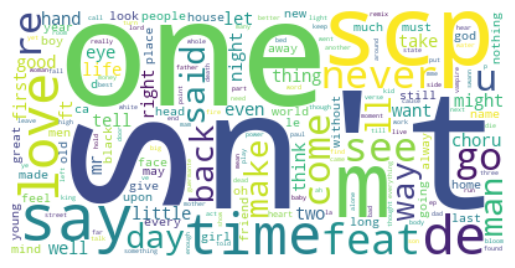

In [159]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(collocations = False, 
                      background_color = 'white').generate(' '.join(data['LyricsClean']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [172]:
data.to_csv('final_dataset.csv')

In [161]:
x = data['LyricsClean']

In [162]:
y = data['mood']

In [163]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [164]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [165]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

c:\Users\Sangharsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5026455026455027

In [166]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.42328042328042326

In [171]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'linear', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.4973544973544973

In [173]:
import tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, SpatialDropout1D, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Tokenize the lyrics
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y_categorical, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))
model.add(Bidirectional(GRU(64, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Use EarlyStopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
batch_size = 64
epochs = 20

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), 
                    callbacks=[early_stop], verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_test, y_test, verbose=2, batch_size=batch_size)
print(f'Test accuracy: {acc}')



